# Transforming your data

The `transform` module in `scarab` helps transform your data so that it can be processed further. To demonstrate the various functionalities of this module, we will ise one of the bursts detected from FRB 20240114A using the uGMRT, which is from a collection of 167 bursts reported in [Panda et al. 2024](https://arxiv.org/abs/2405.09749). The data has 128 channels, and a sampling time of 10.24 $\mu$s. The burst was detected in Band 4 (550 to 750 MHz) of the uGMRT. Before proceeding further, let us import the necessary modules:

In [1]:
from scarab.base import Burst
from scarab.transform import Transformer

In [2]:
from pathlib import Path

basedir = Path("../frbfollow/240114A").resolve()

burstpaths = list(
    (
        basedir
        / "ddtc333"
        / "detections"
        / "chopped_cd"
    ).glob("*SNR55*.fil")
)

burstpath = burstpaths[0]

[PosixPath('/mnt/disk2/data/Ujjwal/frbfollow/240114A/ddtc333/detections/chopped_cd/frb240114A_SCAN0_T2350.101955_DM_528.5_SNR55.61.fil')]

Now, we load our burst:

In [3]:
burst = Burst.new(burstpath)

And plot it:

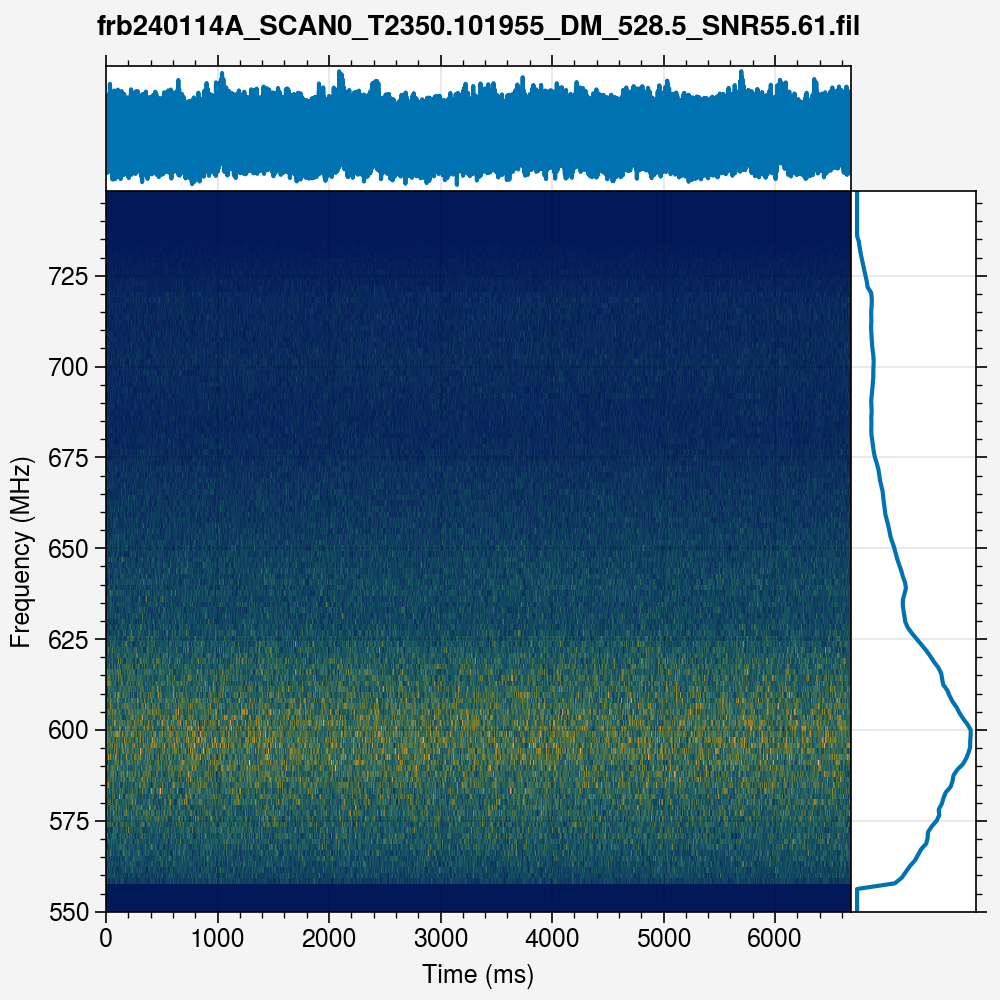

In [4]:
burst.plot()

Note that the burst cannot be seen at all. This is because the data has not been appropriately processed. In particular, the bandpass for the above data has not been normalised, which is particularly necessary for Band 4 (550 to 750 MHz) at the uGMRT, since the bandpass falls rises and falls steeply. Hence, we first normalise the bandpass:

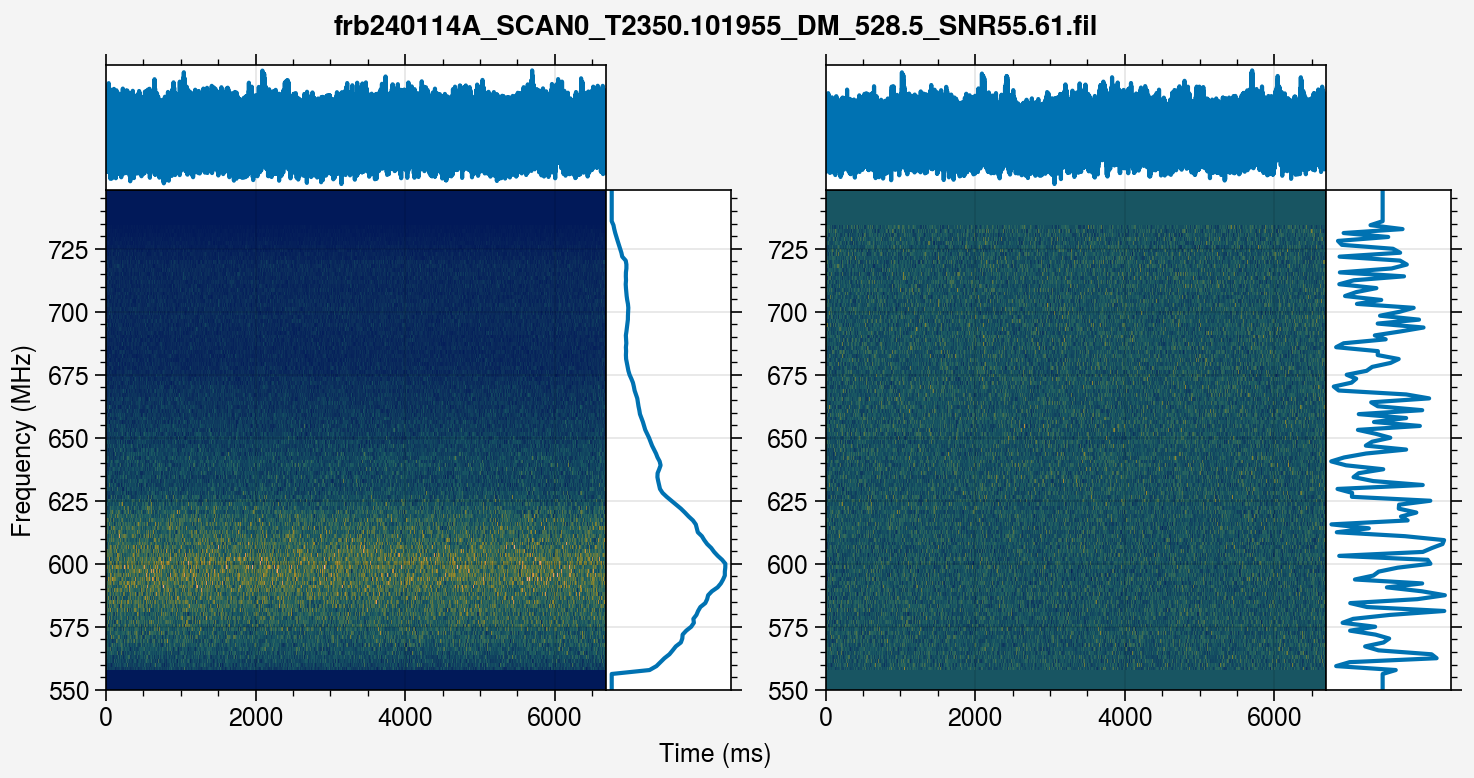

In [5]:
T1 = Transformer.new(burst)
T2 = T1.normalise()
T1.plot()

We then dedisperse the burst at its detection DM:

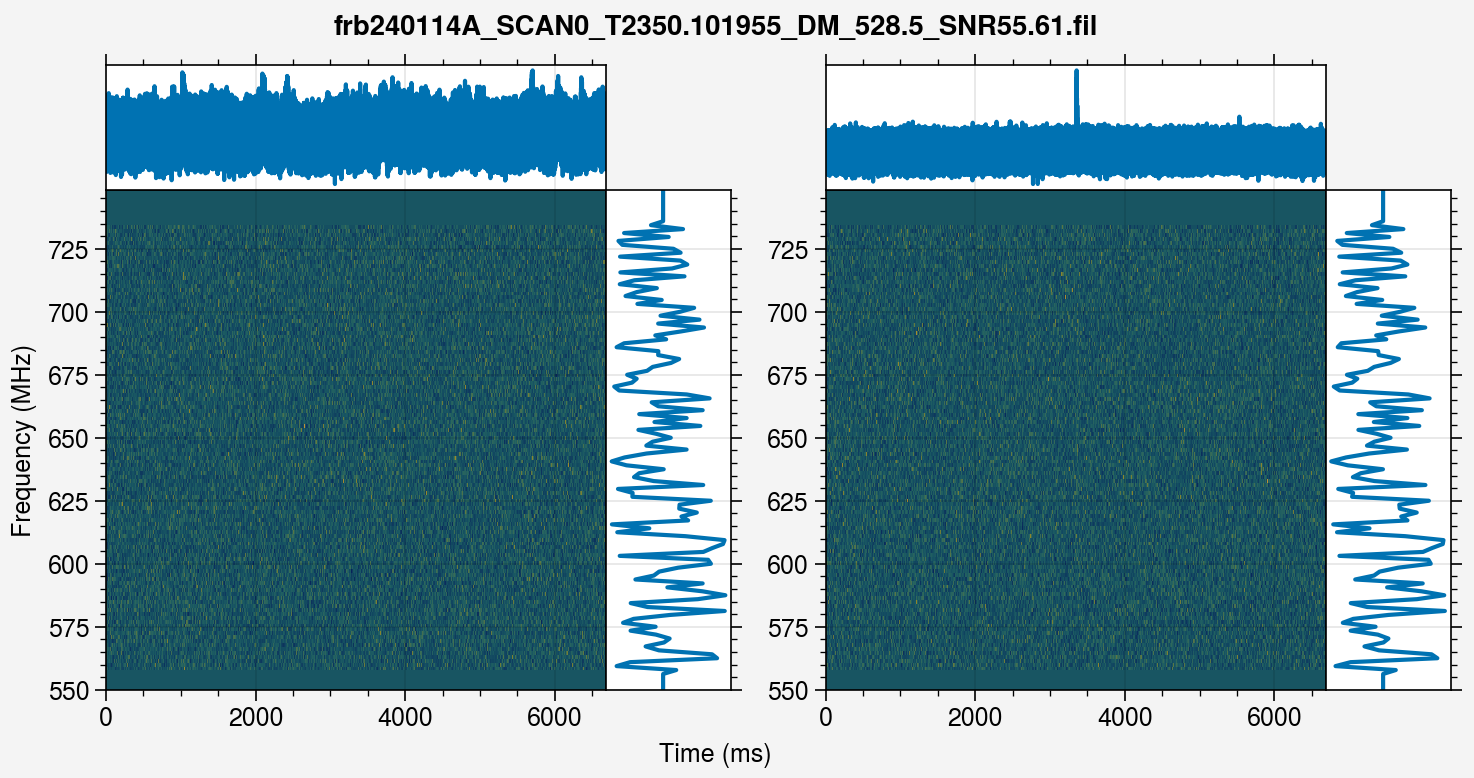

In [6]:
T3 = T2.dedisperse(dm=528.0)
T2.plot()

We can finally see the burst. However, the signal-to-noise ratio (S/N) is too low. To increase, we can downsample the data along frequency and time. The data has only 128 channels, but the sampling time is 2.56 $\mu$s, which makes downsampling along time more feasible. We downsample by a factor of 256, which reduces the sampling time to 655.36 $\mu$s:

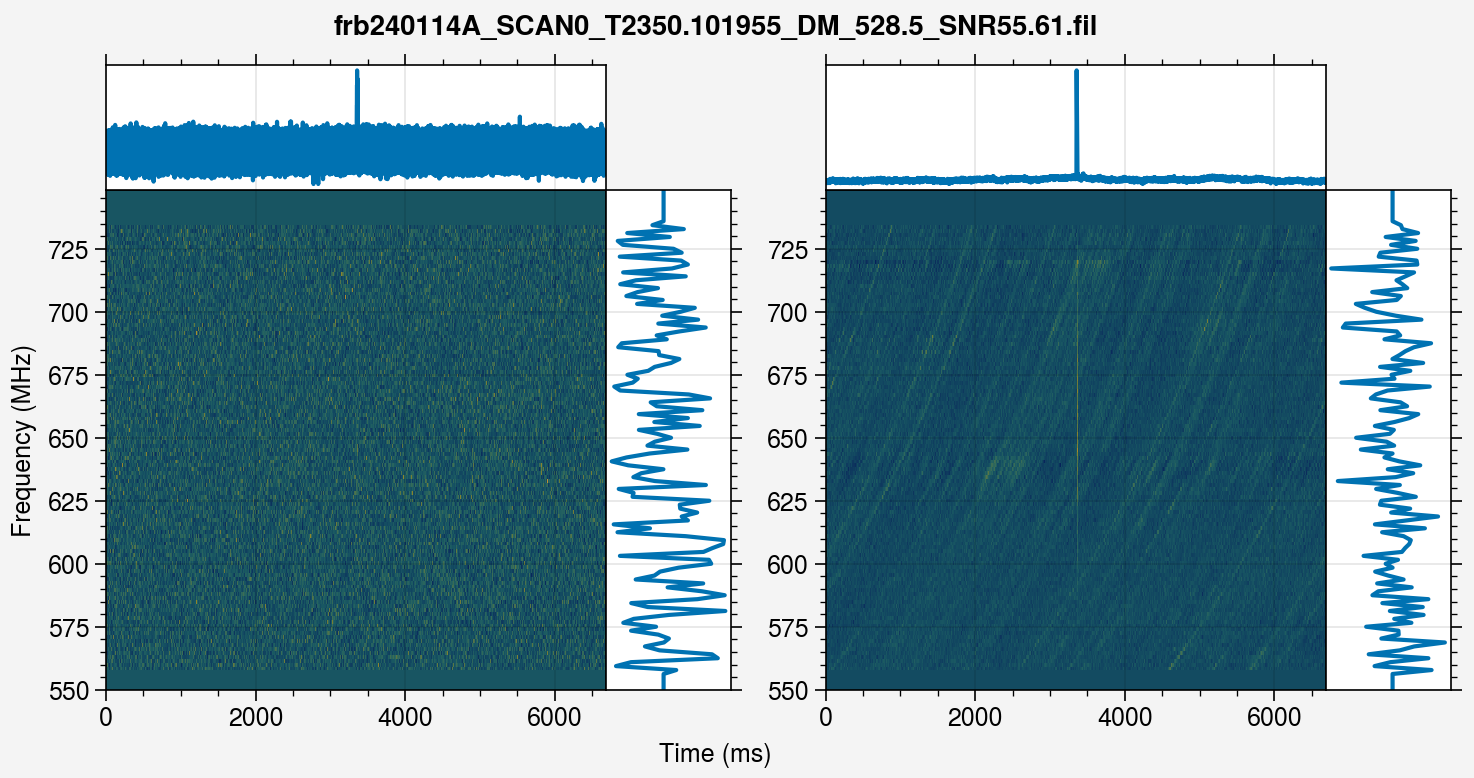

In [7]:
T4 = T3.scrunch(tf=256, ff=1)
T3.plot()

We can now see the burst clearly even in the dynamic spectrum, but its features are not clearly visible, since the data covers almost 6 seconds in time. We can clip the data in time to get a closer look. Let us zoom to within 100 ms:

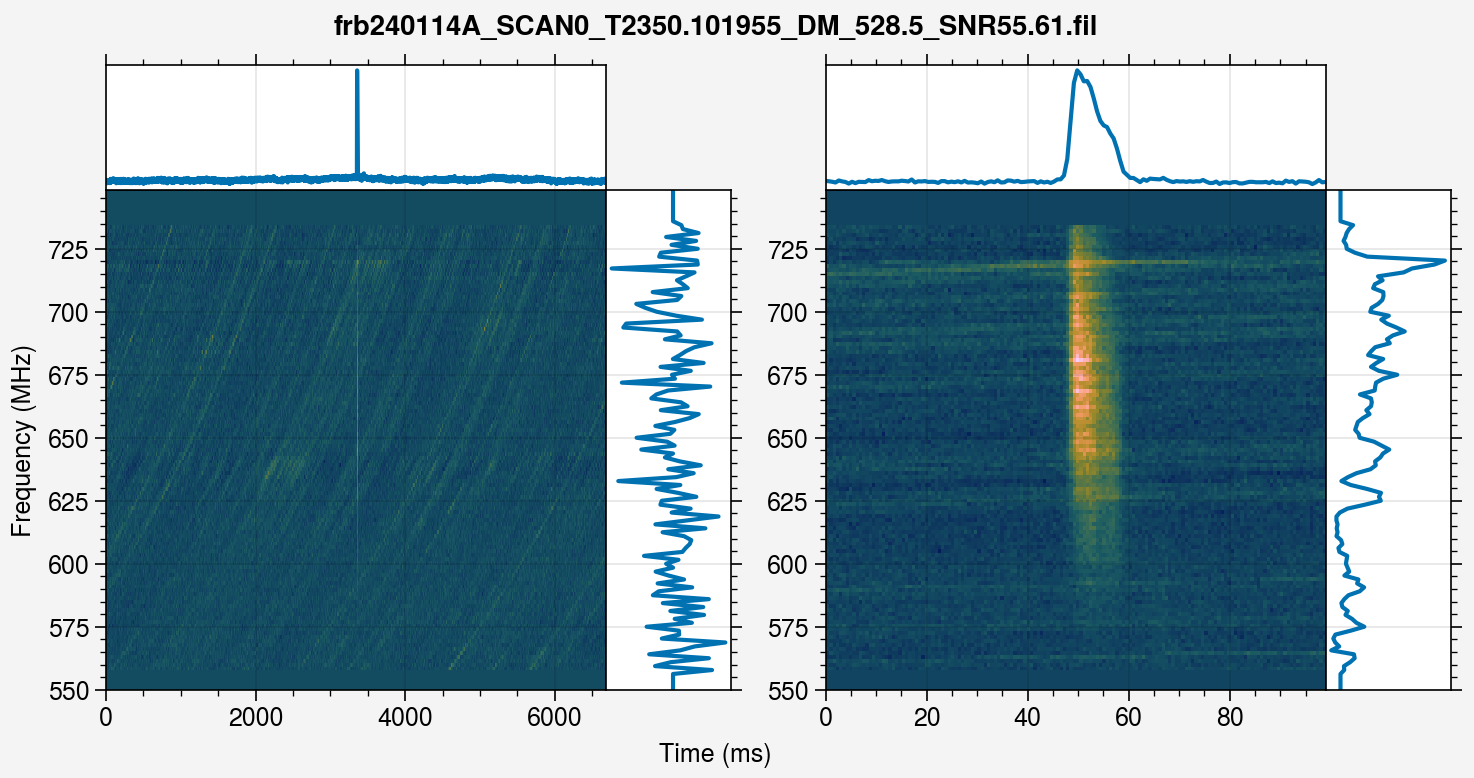

In [8]:
T5 = T4.clip(within=50e-3)
T4.plot()

We can now see the features clearly. We will now mask the emission so that we only fit for the channels where the burst is actually present:

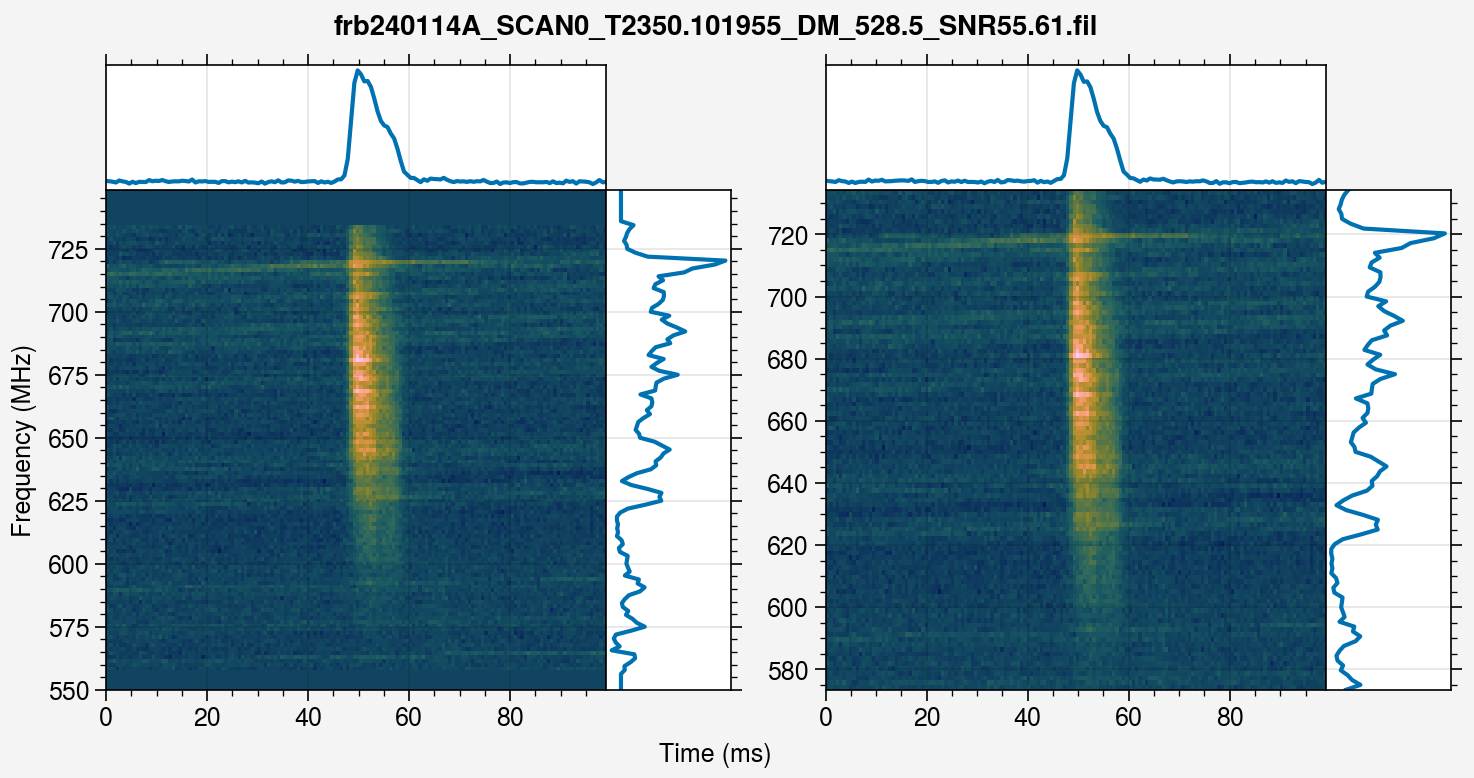

In [9]:
T6 = T5.mask(boxwidth=10, snrthres=10.0)
T5.plot()

And voila! We have our data. We can finally obtain the burst, and start our analysis:

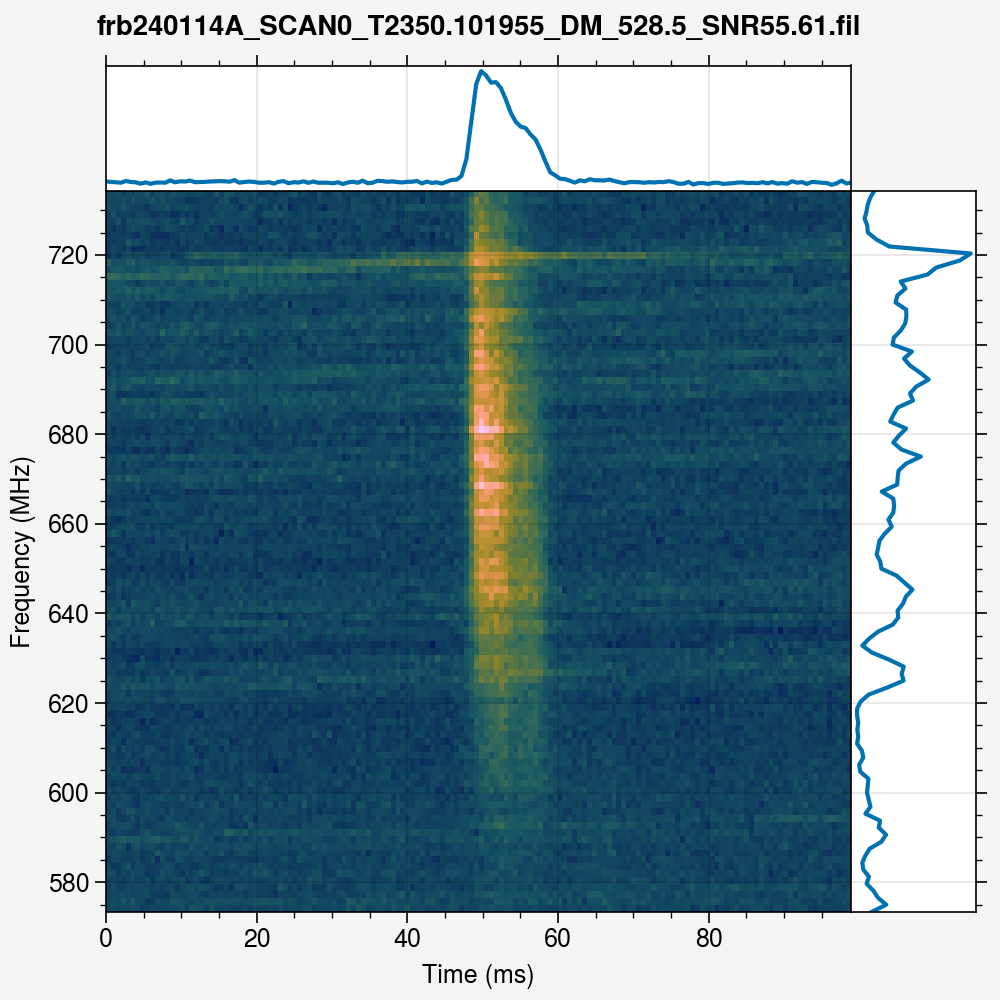

In [10]:
burst = T6.transformed
burst.plot()